In [126]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor, plot_tree

In [29]:
orig_df = pd.read_csv('car_fuel_efficiency.csv')
orig_df.shape

(9704, 11)

In [30]:
orig_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset
```
Preparation:

Fill missing values with zeros.
Do train/validation/test split with 60%/20%/20% distribution.
Use the train_test_split function and set the random_state parameter to 1.
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
```

In [31]:
target = 'fuel_efficiency_mpg'
numeric_cols = list(orig_df.select_dtypes(include=np.number).columns)
numeric_cols.remove(target)
print(f'Numeric Columns: {numeric_cols}')

categorical_cols = list(orig_df.select_dtypes(exclude=np.number).columns)
print(f'Categorical Columns: {categorical_cols}')

Numeric Columns: ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'num_doors']
Categorical Columns: ['origin', 'fuel_type', 'drivetrain']


In [32]:
orig_df[numeric_cols].describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000


In [41]:
for col in categorical_cols:
    print(orig_df[col].value_counts(dropna=False))

origin
Europe    3254
Asia      3247
USA       3203
Name: count, dtype: int64
fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64
drivetrain
All-wheel drive      4876
Front-wheel drive    4828
Name: count, dtype: int64


In [33]:
df = orig_df.copy()
df[numeric_cols] = orig_df[numeric_cols].fillna(0)
df[categorical_cols] = orig_df[categorical_cols].fillna('NA')

In [34]:
df[numeric_cols].describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors
count,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,3.765664,138.738355,3001.280993,13.582275,2011.484027,-0.006080
std,49.455319,2.130715,48.401189,497.894860,5.025294,6.659808,1.020689
min,10.000000,0.000000,0.000000,952.681761,0.000000,2000.000000,-4.000000
25%,170.000000,2.000000,124.000000,2666.248985,12.600000,2006.000000,-1.000000
50%,200.000000,4.000000,146.000000,2993.226296,14.700000,2012.000000,0.000000
75%,230.000000,5.000000,168.000000,3334.957039,16.500000,2017.000000,1.000000
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000


In [40]:
for col in categorical_cols:
    print(df[col].value_counts(dropna=False))

origin
Europe    3254
Asia      3247
USA       3203
Name: count, dtype: int64
fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64
drivetrain
All-wheel drive      4876
Front-wheel drive    4828
Name: count, dtype: int64


### Train and Test Split

In [50]:
full_train_df, test_df = train_test_split(df, test_size=0.20, random_state=1)

In [51]:
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=1)

In [52]:
print(train_df.shape[0]/df.shape[0], val_df.shape[0]/df.shape[0], test_df.shape[0]/df.shape[0])

0.5999587798845837 0.20002061005770816 0.20002061005770816


### Create Dict Vectorizer

In [68]:
y_train = train_df[target]
y_val = val_df[target]
y_test = test_df[target]

In [65]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_df[numeric_cols+categorical_cols].to_dict(orient='records'))
X_val = dv.fit_transform(val_df[numeric_cols+categorical_cols].to_dict(orient='records'))
X_test= dv.fit_transform(test_df[numeric_cols+categorical_cols].to_dict(orient='records'))

In [66]:
dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

### Question 1
```
Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

'vehicle_weight'
'model_year'
'origin'
'fuel_type'

```


In [124]:
tree_reg = DecisionTreeRegressor(max_depth=1, random_state=1)
tree_model = tree_reg.fit(X_train, y_train)

[Text(0.5, 0.75, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.25, 0.25, 'squared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2.453\nsamples = 2788\nvalue = 12.938'),
 Text(0.625, 0.5, '  False')]

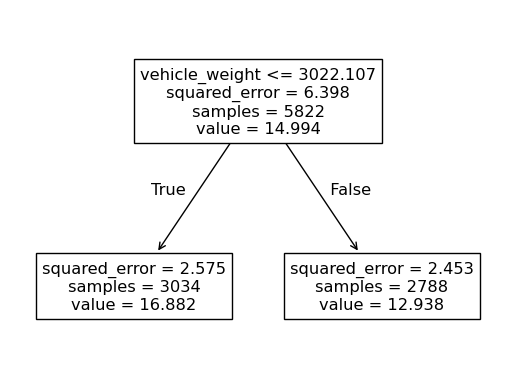

In [127]:
plot_tree(tree_model, feature_names=dv.get_feature_names_out())                    

## Question 2
```
Train a random forest regressor with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on the validation data?

0.045
0.45
4.5
45.0
```

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
y_val_pred

array([18.63022386, 15.28350603, 18.23335218, ..., 14.76992054,
       13.42136371, 16.09078634])

In [132]:
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
rmse_val

np.float64(0.4570712602619733)

### Question 3
```
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

10
25
80
200
If it doesn't stop improving, use the latest iteration number in your answer.
```

### Question 4
```
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?

10
15
20
25
```


### Question 5
```
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?

vehicle_weight
horsepower
acceleration
engine_displacement
```

### Question 6
```
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

0.3
0.1
Both give equal value
```